In [91]:
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [92]:
def make_sql_df(query, host, user, password, db):
    conn = pymysql.connect(host = host, user = user, password = password,
                        db = db, charset = 'utf8')
    cur = conn.cursor(pymysql.cursors.DictCursor)
    cur.execute(query)
    rows = cur.fetchall() # 모든 데이터를 가져옴

    df = pd.DataFrame(rows) # DataFrame 형태로 변환

    cur.close()
    conn.close() # 데이터베이스 연결 종료

    return df

In [93]:
q = """
select p.product_id, p.country_id, p.product_name, p.product_price, col.Cost_of_Living_Index
from product p
inner join countries c on p.country_id = c.country_id
inner join Cost_of_Living col on c.country_id = col.country_id
where product_name in ('POTATO', 'RICE', 'BREAD', 'BEEF',
                       'CHICKEN', 'MILK', 'CHEESE', 'EGG')"""

# product = make_sql_df(q, '172.20.49.206', 'hyojun', '1234', 'sql_project')
df = make_sql_df(q, 'localhost', 'joo9810', 'signcity114', 'project3')
df

,product_id,country_id,product_name,product_price,Cost_of_Living_Index
0,BEE,AUS,BEEF,2.14,70.3
1,BEE,AUS,BEEF,2.14,65.0
2,BEE,AUS,BEEF,2.14,75.5
3,BEE,AUS,BEEF,2.14,65.3
4,BEE,AUS,BEEF,2.14,66.6
...,...,...,...,...,...
875,RIC,USA,RICE,0.46,90.1
876,RIC,USA,RICE,0.46,81.6
877,RIC,USA,RICE,0.46,74.8
878,RIC,USA,RICE,0.46,65.7


In [94]:
product = df[['product_id', 'country_id', 'product_name', 'product_price']]
product = product.drop_duplicates()
product

,product_id,country_id,product_name,product_price
0,BEE,AUS,BEEF,2.14
6,BEE,AUT,BEEF,3.16
9,BEE,CAN,BEEF,2.19
21,BEE,CHE,BEEF,7.24
26,BEE,DEU,BEEF,2.66
...,...,...,...,...
839,RIC,KOR,RICE,0.30
840,RIC,LUX,RICE,0.23
841,RIC,NOR,RICE,0.29
844,RIC,TUR,RICE,0.18


In [95]:
def grocery_price(country_id):
    return product[product['country_id'] == country_id]['product_price'].sum()

In [96]:
country_code = ['CHE', 'KOR', 'ISL', 'NOR', 'LUX', 'USA', 'FRA', 'AUT',
                'DNK', 'CAN', 'JPN', 'ITA', 'AUS', 'DEU', 'GBR', 'TUR']

country_name = ['스위스', '대한민국', '아이슬란드', '노르웨이', '룩셈부르크',
                '미국', '프랑스', '오스트리아', '덴마크', '캐나다', '일본',
                '이탈리아', '호주', '독일', '영국', '터키']

staple = ['감자', '흰쌀', '식빵', '쇠고기', '치킨', '우유', '치즈', '계란']

In [97]:
country_dict = dict(zip(country_code, country_name))
country_dict

{'CHE': '스위스',
 'KOR': '대한민국',
 'ISL': '아이슬란드',
 'NOR': '노르웨이',
 'LUX': '룩셈부르크',
 'USA': '미국',
 'FRA': '프랑스',
 'AUT': '오스트리아',
 'DNK': '덴마크',
 'CAN': '캐나다',
 'JPN': '일본',
 'ITA': '이탈리아',
 'AUS': '호주',
 'DEU': '독일',
 'GBR': '영국',
 'TUR': '터키'}

In [98]:
total_grocery = []

for i in country_code:
    total_grocery.append(round(grocery_price(i), 2))

In [99]:
total_dict = dict(zip(country_name, total_grocery))
sort_dict = sorted(total_dict.items(), key = lambda x : x[1])
sort_dict

[('터키', 5.8),
 ('영국', 6.15),
 ('일본', 6.78),
 ('호주', 6.87),
 ('캐나다', 7.95),
 ('덴마크', 8.22),
 ('이탈리아', 8.26),
 ('미국', 8.45),
 ('독일', 8.59),
 ('룩셈부르크', 9.29),
 ('프랑스', 9.38),
 ('오스트리아', 9.53),
 ('노르웨이', 9.99),
 ('대한민국', 10.27),
 ('아이슬란드', 13.01),
 ('스위스', 18.13)]

In [100]:
plot_name = []
plot_value = []

for i in range(len(sort_dict)):
    plot_name.append(sort_dict[i][0])

for i in range(len(sort_dict)):
    plot_value.append(sort_dict[i][1])
print(plot_name, plot_value)

['터키', '영국', '일본', '호주', '캐나다', '덴마크', '이탈리아', '미국', '독일', '룩셈부르크', '프랑스', '오스트리아', '노르웨이', '대한민국', '아이슬란드', '스위스'] [5.8, 6.15, 6.78, 6.87, 7.95, 8.22, 8.26, 8.45, 8.59, 9.29, 9.38, 9.53, 9.99, 10.27, 13.01, 18.13]


## OECD 국가별 식료품(주식) 물가 비교

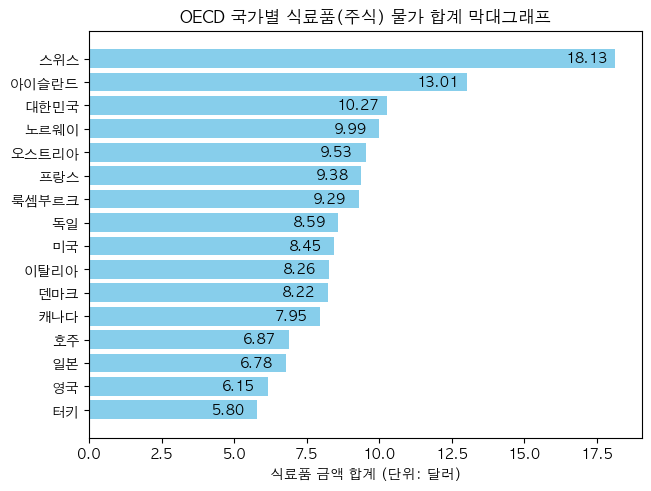

In [101]:
# 품종별 특징 비교 다중그래프
plt.rcParams['font.family'] = 'AppleGothic'
fig, ax = plt.subplots(layout='constrained')
bars = plt.barh(plot_name, plot_value, color='skyblue')

# 각 막대 위에 값 추가
for bar in bars:
    plt.text(bar.get_width() - 1.0,  # 막대 너비 - 1.5
             bar.get_y() + bar.get_height()/2,  # 막대 y축 시작위치 + 막대 높이/2
             f'{bar.get_width():.2f}',  # 값 표시
             va='center', ha='center')

plt.title('OECD 국가별 식료품(주식) 물가 합계 막대그래프')
plt.xlabel('식료품 금액 합계 (단위: 달러)')
plt.show()

## 스위스와 나머지 국가들의 식료품(주식) 별 물가 비교

In [102]:
product[product['country_id'] == 'CHE']

,product_id,country_id,product_name,product_price
21,BEE,CHE,BEEF,7.24
131,BRT,CHE,BREAD,0.95
241,CHE,CHE,CHEESE,2.68
351,CHK,CHE,CHICKEN,4.40
461,EGG,CHE,EGG,1.43
571,MIL,CHE,MILK,0.51
681,POT,CHE,POTATO,0.51
791,RIC,CHE,RICE,0.41


In [103]:
staple_name = ['소고기', '식빵', '치즈', '닭고기', '계란', '우유', '감자', '쌀']
staple_value = product[product['country_id'] == 'CHE']['product_price'].to_list()

print(staple_name, staple_value)

['소고기', '식빵', '치즈', '닭고기', '계란', '우유', '감자', '쌀'] [7.24, 0.95, 2.68, 4.4, 1.43, 0.51, 0.51, 0.41]


In [104]:
# 스위스 제외국가 식료품별 가격 평균
oecd_price = product[product['country_id'] != 'CHE'].iloc[:, 2:].groupby('product_name').mean()
round_oecd_price = [round(i, 2) for i in oecd_price['product_price'].to_list()]
round_oecd_price

[3.03, 0.62, 1.31, 1.74, 0.75, 0.39, 0.45, 0.28]

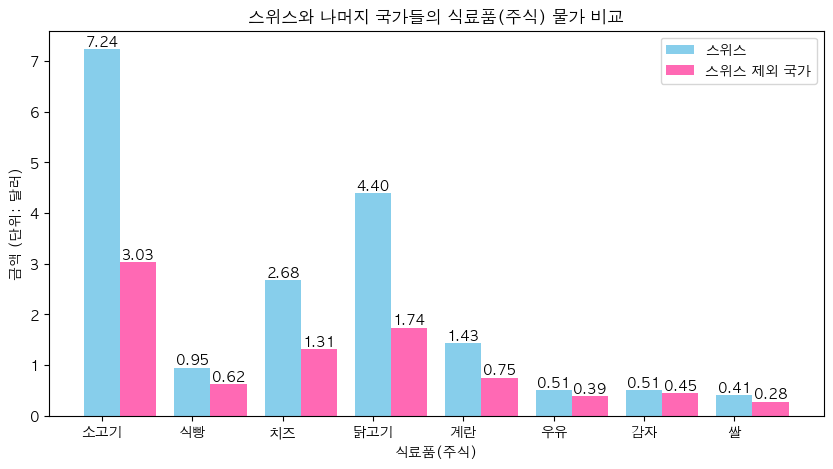

In [105]:
plt.figure(figsize = (10, 5))
bar1 = plt.bar(np.arange(8), staple_value, width = 0.4, label = '스위스', color = 'skyblue')
bar2 = plt.bar(np.arange(8) + 0.4, round_oecd_price, width = 0.4,
               label = '스위스 제외 국가', color = 'hotpink')

# 값 추가
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom')

for bar in bar2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.xticks(np.arange(8), staple_name)
plt.title('스위스와 나머지 국가들의 식료품(주식) 물가 비교')
plt.xlabel('식료품(주식)')
plt.ylabel('금액 (단위: 달러)')
plt.legend()
plt.show()



> 스위스의 식료품 물가가 압도적으로 높게 나왔고 각 품목별로도 모두 높게 나왔다. 이러한 이유를 확인하기 위해 자료 조사를 진행하였다.

https://www.youtube.com/watch?v=nv7ILq-Rag4

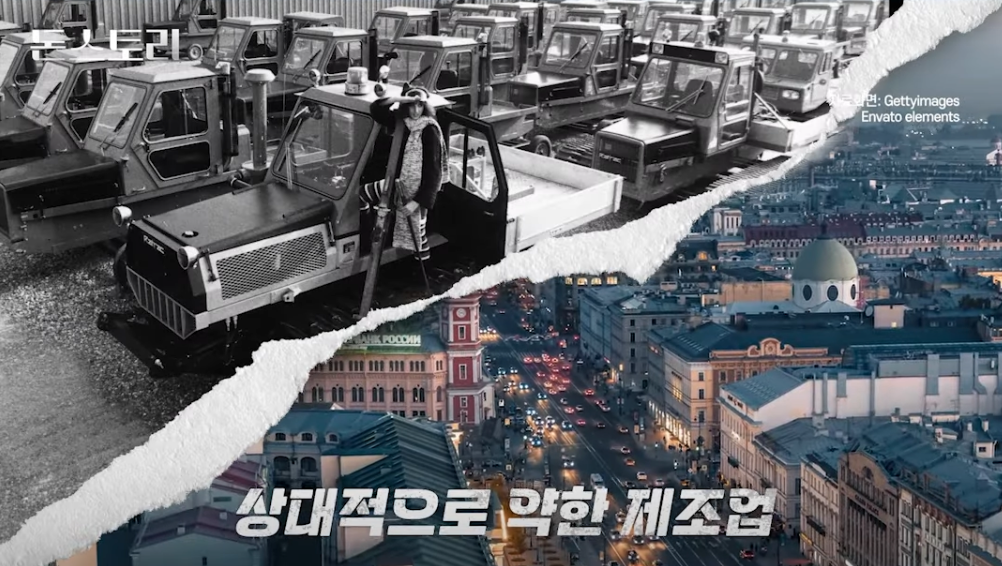

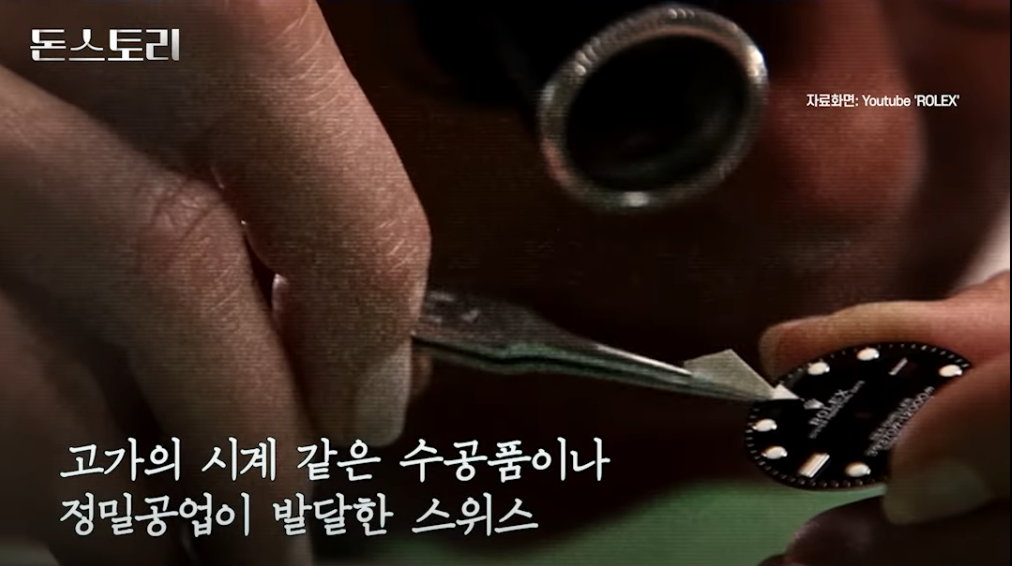

> 스위스는 일상생활에서 주로 사용하는 제조가 아닌 수공품이나 정밀공업이 발달해서 생활용품을 다른 국가로부터 조달 받아야 할 수 밖에 없는 상황이다. 따라서 스위스는 주변국들의 경제 상황에 따라 물가가 크게 흔들릴 수 밖에 없다.

In [106]:
code = ('CHE', 'KOR', 'ISL', 'NOR', 'LUX', 'USA', 'FRA', 'AUT',
        'DNK', 'CAN', 'JPN', 'ITA', 'AUS', 'DEU', 'GBR', 'TUR')

CoL = df[['country_id', 'Cost_of_Living_Index']]
CoL

,country_id,Cost_of_Living_Index
0,AUS,70.3
1,AUS,65.0
2,AUS,75.5
3,AUS,65.3
4,AUS,66.6
...,...,...
875,USA,90.1
876,USA,81.6
877,USA,74.8
878,USA,65.7


In [107]:
gb_mean = CoL[['country_id', 'Cost_of_Living_Index']].groupby('country_id').mean()
gb_mean_sort = gb_mean.sort_values('Cost_of_Living_Index', ascending=False)
gb_value = gb_mean_sort['Cost_of_Living_Index'].to_list()
gb_mean_sort

,Cost_of_Living_Index
country_id,
CHE,110.160000
ISL,85.100000
NOR,79.533333
USA,75.865625
DNK,75.300000
KOR,71.300000
AUS,69.466667
FRA,68.933333
LUX,67.000000


In [108]:
country_list = []

for i in range(len(gb_mean_sort.index)):
    for j in range(len(gb_mean_sort.index)):
        if gb_mean_sort.index[i] == list(country_dict.keys())[j]:
            country_list.append(list(country_dict.values())[j])
country_list

['스위스',
 '아이슬란드',
 '노르웨이',
 '미국',
 '덴마크',
 '대한민국',
 '호주',
 '프랑스',
 '룩셈부르크',
 '오스트리아',
 '독일',
 '캐나다',
 '영국',
 '이탈리아',
 '일본',
 '터키']

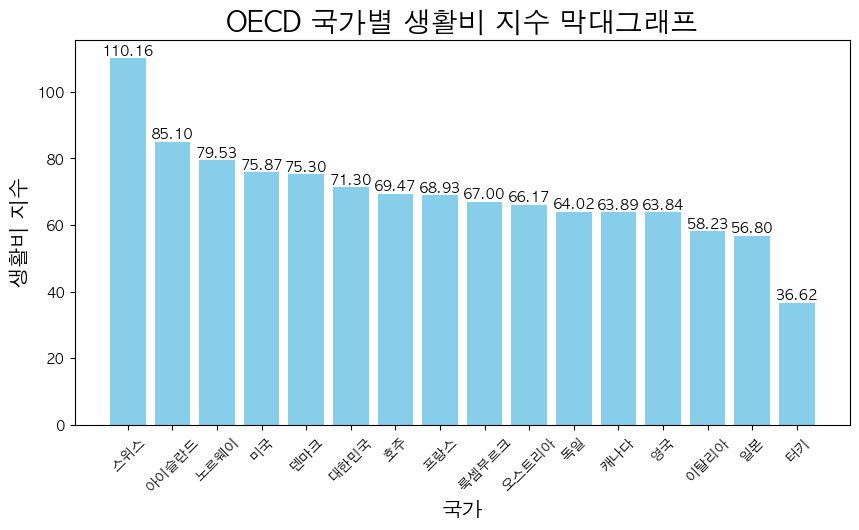

In [109]:
plt.figure(figsize = (10, 5))
bar3 = plt.bar(country_list, gb_value, color = 'skyblue')
plt.title('OECD 국가별 생활비 지수 막대그래프', fontsize = '20')
plt.xlabel('국가', fontsize = '15')
plt.ylabel('생활비 지수', fontsize = '15')
plt.xticks(rotation = 45)

# 값 추가
for bar in bar3:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.show()